In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier, XGBRegressor

In [19]:
df=pd.read_csv("smart_grid_stability_augmented.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB


In [21]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243,0.036917
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,-0.080760
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497,-0.015557
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007,0.017142
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490,0.044878
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,0.109403


In [22]:
# convert categorial value into numericals
X=df
y=df['stabf']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['stabf']=le.fit_transform(X['stabf'])
y=le.transform(y)

In [23]:
def preprocess_inputs(df, task='classification'):
    df = df.copy()
    
    if task == 'classification':
        df = df.drop('stab', axis=1)
        
        y = df['stabf'].copy()
        X = df.drop('stabf', axis=1).copy()
        
    elif task == 'regression':
        df = df.drop('stabf', axis=1)
        
        y = df['stab'].copy()
        X = df.drop('stab', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    return X_train, X_test, y_train, y_test

In [24]:
#Classifier
#to predict if a given grid is stable or not

X_train, X_test, y_train, y_test = preprocess_inputs(df, task='classification')

In [25]:
X_train

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
51782,4.306374,7.111600,2.698565,1.667149,4.036521,-0.661915,-1.721545,-1.653061,0.502570,0.357268,0.784432,0.283608
53781,8.196407,3.969140,8.062070,2.770065,2.307235,-0.759482,-0.980846,-0.566906,0.656218,0.339355,0.631997,0.181889
55123,9.030050,7.459977,7.533218,2.704361,2.297036,-0.888640,-0.907252,-0.501144,0.520756,0.668365,0.979940,0.962761
35823,0.615170,1.946848,6.944750,3.811661,4.115997,-1.014799,-1.428489,-1.672709,0.363591,0.136974,0.089364,0.896053
48869,9.689491,6.842392,6.715817,2.300154,2.394670,-0.603920,-1.174640,-0.616110,0.500522,0.102504,0.747755,0.052535
...,...,...,...,...,...,...,...,...,...,...,...,...
50057,2.918050,8.634376,1.492789,3.289806,3.928822,-0.735709,-1.580769,-1.612345,0.315826,0.762099,0.817872,0.278033
32511,7.833738,4.576594,8.163828,8.902948,3.853314,-1.528091,-0.853671,-1.471552,0.689789,0.084526,0.738146,0.947283
5192,5.085242,1.790031,2.486392,2.848192,3.159670,-0.892898,-1.025461,-1.241311,0.473917,0.418512,0.326253,0.982488
12172,2.103806,7.834493,0.678007,6.619317,4.946095,-1.320590,-1.724641,-1.900864,0.723385,0.223536,0.745005,0.339882


In [26]:
y_train

51782    0
53781    1
55123    1
35823    0
48869    1
        ..
50057    0
32511    1
5192     1
12172    0
33003    1
Name: stabf, Length: 42000, dtype: int32

In [27]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
print("Classifier trained.")

Classifier trained.


In [28]:
print("Classification Test Accuracy: {:.2f}%".format(clf.score(X_test, y_test) * 100))

Classification Test Accuracy: 97.79%


In [29]:
#Regression
#to predict a numerical estimate of its stability

X_train, X_test, y_train, y_test = preprocess_inputs(df, task='regression')

In [30]:
X_train

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
51782,4.306374,7.111600,2.698565,1.667149,4.036521,-0.661915,-1.721545,-1.653061,0.502570,0.357268,0.784432,0.283608
53781,8.196407,3.969140,8.062070,2.770065,2.307235,-0.759482,-0.980846,-0.566906,0.656218,0.339355,0.631997,0.181889
55123,9.030050,7.459977,7.533218,2.704361,2.297036,-0.888640,-0.907252,-0.501144,0.520756,0.668365,0.979940,0.962761
35823,0.615170,1.946848,6.944750,3.811661,4.115997,-1.014799,-1.428489,-1.672709,0.363591,0.136974,0.089364,0.896053
48869,9.689491,6.842392,6.715817,2.300154,2.394670,-0.603920,-1.174640,-0.616110,0.500522,0.102504,0.747755,0.052535
...,...,...,...,...,...,...,...,...,...,...,...,...
50057,2.918050,8.634376,1.492789,3.289806,3.928822,-0.735709,-1.580769,-1.612345,0.315826,0.762099,0.817872,0.278033
32511,7.833738,4.576594,8.163828,8.902948,3.853314,-1.528091,-0.853671,-1.471552,0.689789,0.084526,0.738146,0.947283
5192,5.085242,1.790031,2.486392,2.848192,3.159670,-0.892898,-1.025461,-1.241311,0.473917,0.418512,0.326253,0.982488
12172,2.103806,7.834493,0.678007,6.619317,4.946095,-1.320590,-1.724641,-1.900864,0.723385,0.223536,0.745005,0.339882


In [31]:
y_train

51782   -0.012548
53781    0.032672
55123    0.069865
35823   -0.044868
48869    0.020140
           ...   
50057   -0.028760
32511    0.075413
5192     0.003594
12172   -0.042775
33003    0.055588
Name: stab, Length: 42000, dtype: float64

In [32]:
reg = XGBRegressor()
reg.fit(X_train, y_train)
print("Regressor trained.")

Regressor trained.


<AxesSubplot:xlabel='stab'>

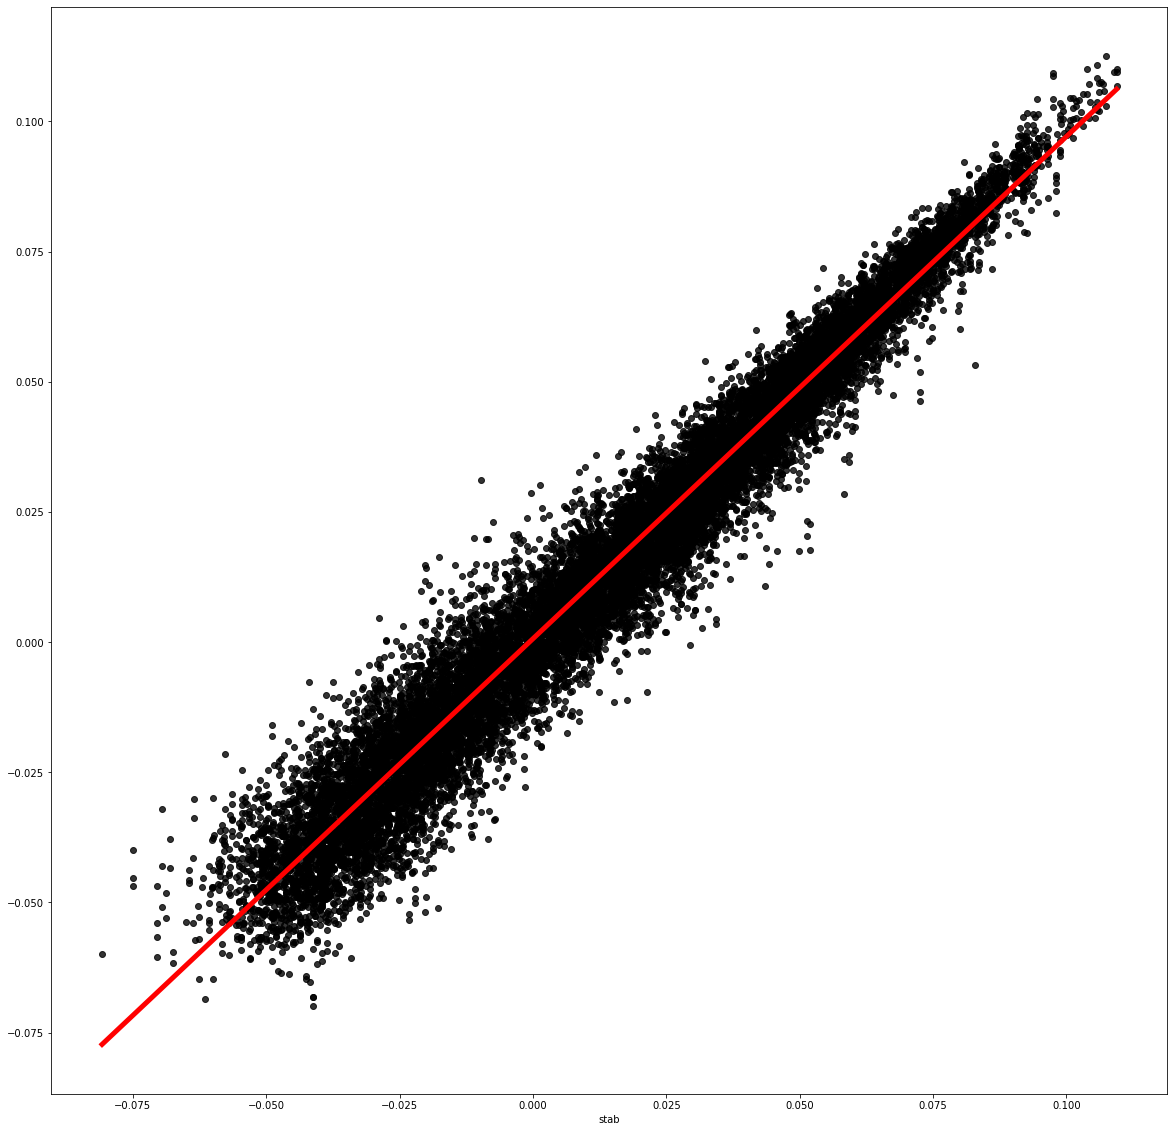

In [37]:
import seaborn as sns
y_pred=reg.predict(X_test)
fig=plt.gcf()
fig.set_size_inches(20,20)
sns.regplot(x=y_test,y=y_pred,ci=None,color='Black',line_kws={'color':'red','lw':5})


In [33]:
print("Regression Test R^2 Score: {:.5f}".format(reg.score(X_test, y_test)))

Regression Test R^2 Score: 0.95796
